# Insurance Claim Prediction

## Problem Statement

Task 1:-Create a predictive model which will help the insurance marketing team to know which customer will buy the product.

Task 2:-Suggestions to the Insurance market team to make  customers  buy the product.


## Domain Expertise
  - Target: This column is likely the target variable or the variable we want to predict, such as whether a customer will buy an insurance product or not.
  
  - ps_ind: Columns with the prefix ps_ind likely represent individual or personal characteristics of the customers or policyholders. The suffix _cat indicates a categorical feature, while _bin suggests a binary feature (0 or 1).
  
- ps_reg: These columns with the prefix ps_reg may refer to regional or geographical features, possibly related to the location of the customer or policyholder.

- ps_car: These columns with the prefix ps_car are likely related to characteristics of the customer's vehicle or car, such as make, model, year, or other vehicle-specific features. Again, the suffix _cat indicates categorical features.

- ps_calc: These columns with the prefix ps_calc may represent calculated or derived features based on other variables in the dataset. The suffix _bin suggests binary features.

## Importing Necessary Libraries

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelBinarizer,StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import ADASYN,SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')
from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.augmentations import ClassificationSMOTE
from pytorch_tabnet.pretraining import TabNetPretrainer




import torch
np.random.seed(0)

import scipy

import os
import wget
from pathlib import Path


## Loading Data

Here we load our data into a dataframe

In [2]:
train = pd.read_csv('/home/xevator/Projects/PRCP-1010-InsClaimPred/Data/train.csv')
df = train
target = 'target'
if "Set" not in train.columns:
    train["Set"] = None
    train.loc[train.target==0,"Set"] = np.random.choice(["train", "valid", "test"], p =[.9, .05, .05], size=(train[train.target==0].shape[0],))
    train.loc[train.target==1,"Set"] = np.random.choice(["train", "valid", "test"], p =[.9, .05, .05], size=(train[train.target==1].shape[0],))

train_indices = train[train.Set=="train"].index
valid_indices = train[train.Set=="valid"].index
test_indices = train[train.Set=="test"].index

## Basic checks

In [3]:
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,Set
0,7,0,2,2,5,1,0,0,1,0,...,1,5,8,0,1,1,0,0,1,train
1,9,0,1,1,7,0,0,0,0,1,...,1,1,9,0,1,1,0,1,0,train
2,13,0,5,4,9,1,0,0,0,1,...,2,7,7,0,1,1,0,1,0,train
3,16,0,0,1,2,0,0,1,0,0,...,2,4,9,0,0,0,0,0,0,train
4,17,0,0,2,0,1,0,1,0,0,...,1,1,3,0,0,0,1,1,0,train


In [4]:
df.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,Set
595207,1488013,0,3,1,10,0,0,0,0,0,...,1,9,6,0,1,1,0,1,1,train
595208,1488016,0,5,1,3,0,0,0,0,0,...,1,3,8,1,0,1,0,1,1,train
595209,1488017,0,1,1,10,0,0,1,0,0,...,2,2,6,0,0,1,0,0,0,train
595210,1488021,0,5,2,3,1,0,0,0,1,...,1,4,2,0,1,1,1,0,0,train
595211,1488027,0,0,1,8,0,0,1,0,0,...,4,3,8,0,1,0,0,0,0,train


In [5]:
df.shape

(595212, 60)

The dataset contains 595212 rows and 58 columns.

In [6]:
df.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin', '

In [7]:
df["target"].value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [8]:
df["target"].value_counts()/len(df)

0    0.963552
1    0.036448
Name: target, dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 60 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [10]:
#Checking the stats of all the columns
df.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


No null values present

In [12]:
#Checking number of unique rows in each feature
df.nunique().sort_values()

ps_ind_10_bin          2
ps_ind_16_bin          2
ps_car_08_cat          2
ps_calc_20_bin         2
ps_ind_13_bin          2
ps_ind_12_bin          2
ps_ind_11_bin          2
ps_ind_09_bin          2
ps_ind_17_bin          2
ps_ind_08_bin          2
ps_ind_06_bin          2
ps_calc_15_bin         2
ps_calc_16_bin         2
ps_calc_17_bin         2
ps_calc_18_bin         2
ps_calc_19_bin         2
target                 2
ps_ind_07_bin          2
ps_ind_18_bin          2
ps_car_05_cat          3
ps_car_07_cat          3
ps_car_03_cat          3
ps_car_10_cat          3
ps_car_02_cat          3
Set                    3
ps_ind_04_cat          3
ps_ind_02_cat          5
ps_car_11              5
ps_ind_14              5
ps_car_09_cat          6
ps_calc_04             6
ps_calc_05             7
ps_ind_05_cat          8
ps_calc_09             8
ps_ind_01              8
ps_car_04_cat         10
ps_calc_07            10
ps_calc_03            10
ps_calc_01            10
ps_reg_01             10


## Data Preprocessing

In [13]:
cat_col = train.columns[train.columns.str.contains('cat')]
bin_col = train.columns[train.columns.str.contains('bin')]

In [14]:
num_col =  train.columns[~(train.columns.str.contains('bin')|train.columns.str.contains('cat'))].difference(['id', 'Set','target'])

In [15]:
num_col

Index(['ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05',
       'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10',
       'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_ind_01',
       'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02',
       'ps_reg_03'],
      dtype='object')

In [16]:
nunique = train.nunique()
types = train.dtypes

categorical_columns = []
categorical_dims =  {}
for col in train.columns:
    if (types[col] == 'object' or nunique[col] < 200) and (col in cat_col):
        print(col, train[col].nunique())
        l_enc = LabelEncoder()
        train[col] = l_enc.fit_transform(train[col].values)
        categorical_columns.append(col)
        categorical_dims[col] = len(l_enc.classes_)

ps_ind_02_cat 5
ps_ind_04_cat 3
ps_ind_05_cat 8
ps_car_01_cat 13
ps_car_02_cat 3
ps_car_03_cat 3
ps_car_04_cat 10
ps_car_05_cat 3
ps_car_06_cat 18
ps_car_07_cat 3
ps_car_08_cat 2
ps_car_09_cat 6
ps_car_10_cat 3
ps_car_11_cat 104


In [17]:
unused_feat = ['Set','id']

features = [ col for col in train.columns if col not in unused_feat+[target]] 

## Train Test Split

In [18]:
X_train = pd.DataFrame(train[features].to_numpy()[train_indices],columns=features)
y_train = train[target].values[train_indices]

X_valid = pd.DataFrame(train[features].to_numpy()[valid_indices],columns=features)
y_valid = train[target].values[valid_indices]

X_test = pd.DataFrame(train[features].to_numpy()[test_indices],columns=features)
y_test = train[target].values[test_indices]

## OneHotEncoding

In [19]:
ohe = OneHotEncoder(drop='if_binary',handle_unknown='ignore',sparse_output=False)

In [20]:
ohe.fit(X_train[cat_col])

OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False)

In [21]:
X_train_ohe = pd.DataFrame(data=ohe.transform(X_train[cat_col]),columns=ohe.get_feature_names_out(),index=X_train.index)

In [22]:
X_test_ohe = pd.DataFrame(data=ohe.transform(X_test[cat_col]),columns=ohe.get_feature_names_out(),index=X_test.index)

In [23]:
X_train_pr = pd.concat([X_train[num_col],X_train_ohe,X_train[bin_col]],axis=1)

In [24]:
X_test_pr = pd.concat([X_test[num_col],X_test_ohe,X_test[bin_col]],axis=1)

# Modeling

# 1. Decision Tree

In [25]:
dtree = DecisionTreeClassifier(max_depth=4,class_weight='balanced',criterion = "gini", splitter = "best",min_samples_split = 5,
                              min_samples_leaf = 2, max_features = 2)

In [26]:
dtree.fit(X_train_pr,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_features=2,
                       min_samples_leaf=2, min_samples_split=5)

In [27]:
y_pred_train = dtree.predict(X_train_pr)

In [28]:
y_pred_test = dtree.predict(X_test_pr)

# Evaluation

## Train

In [29]:
accuracy_score(y_train,y_pred_train)

0.0533705820769347

In [30]:
f1_score(y_train,y_pred_train)

0.07056792946505135

In [31]:
roc_auc_score(y_train,y_pred_train)

0.5027646949682907

In [32]:
precision_score(y_train,y_pred_train)

0.036591483459060936

In [33]:
recall_score(y_train,y_pred_train)

0.9874371859296482

## Test

In [34]:
accuracy_score(y_test,y_pred_test)

0.05541680728990887

In [35]:
f1_score(y_test,y_pred_test)

0.07318365454665872

In [36]:
roc_auc_score(y_test,y_pred_test)

0.500094686159158

In [37]:
precision_score(y_test,y_pred_test)

0.03800908090258668

In [38]:
recall_score(y_test,y_pred_test)

0.9813499111900533

When fitting the model with a decision tree, I initially encountered overfitting. To mitigate this, I adjusted several parameters such as max_depth=4, class_weight='balanced', criterion='gini', splitter='best', min_samples_split=5, min_samples_leaf=2, and max_features=2. These adjustments enhanced the performance of the model. Notably, setting max_depth to any value other than 4 resulted in poorer performance. Similarly, using ‘gini’ as the criterion and ‘best’ as the splitter also improved the model’s performance

# 2. RandomForest Classifier

In [39]:
rfc=RandomForestClassifier(n_estimators=300,max_depth=5,n_jobs=-1,class_weight='balanced',min_impurity_decrease=1e-9,random_state=5)

In [40]:
rfc.fit(X_train_pr,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5,
                       min_impurity_decrease=1e-09, n_estimators=300, n_jobs=-1,
                       random_state=5)

In [41]:
y_pred_train = rfc.predict(X_train_pr)

In [42]:
y_pred_test = rfc.predict(X_test_pr)

# Evaluation

### Train

In [43]:
accuracy_score(y_train,y_pred_train)

0.628501633831414

In [44]:
f1_score(y_train,y_pred_train)

0.09803903800496584

In [45]:
roc_auc_score(y_train,y_pred_train) 

0.593025114408627

In [46]:
precision_score(y_train,y_pred_train)

0.053770762303311036

In [47]:
recall_score(y_train,y_pred_train)

0.5547636139883089

### Test

In [48]:
accuracy_score(y_test,y_pred_test)

0.630982112723591

In [49]:
f1_score(y_test,y_pred_test)

0.1045045045045045

In [50]:
roc_auc_score(y_test,y_pred_test)

0.6000662896585142

In [51]:
precision_score(y_test,y_pred_test)

0.05756044749188019

In [52]:
recall_score(y_test,y_pred_test)

0.566607460035524

Compared to the Decision Tree model, the Random Forest model has a higher ROC_AUC score which is 0.59 in train and 0.58 in test and better recall score.Want to try out other models to compare their metric scores and analyze whether they have higher performance.

# 3. XGBoost

In [53]:
XG = XGBClassifier(n_estimators=50,learning_rate=0.2,max_depth=6,min_child_weight=5,gamma=6,reg_alpha=0.05,reg_lambda=0.14,subsample=0.29,colsample_bytree=0.08,objective='binary:logistic',nthread=-1,scale_pos_weight=(1/y_train.mean()-1),seed=27,n_jobs=-1)
XG.fit(X_train_pr,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.08, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=6, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=-1, nthread=-1,
              num_parallel_tree=None, ...)

In [54]:
y_pred_train = XG.predict(X_train_pr)

In [55]:
y_pred_test = XG.predict(X_test_pr)

# Evaluation

### Train

In [56]:
accuracy_score(y_train,y_pred_train)

0.6229236531388038

In [57]:
f1_score(y_train,y_pred_train)

0.10293680214877134

In [58]:
roc_auc_score(y_train,y_pred_train)

0.6092254220165494

In [59]:
precision_score(y_train,y_pred_train)

0.056346996009584774

In [60]:
recall_score(y_train,y_pred_train)

0.5944518510921957

### Test

In [61]:
accuracy_score(y_test,y_pred_test)

0.625548430644617

In [62]:
f1_score(y_test,y_pred_test)

0.10299943406904358

In [63]:
roc_auc_score(y_test,y_pred_test)

0.596815616293173

In [64]:
precision_score(y_test,y_pred_test)

0.056657475762696786

In [65]:
recall_score(y_test,y_pred_test)

0.5657193605683837

In order to achieve better results, I adjusted several parameters such as n_estimators, learning_rate, max_depth, min_child_weight, gamma, reg_alpha, and reg_lambda. As a result, an improvement in the ROC_AUC score is observed, which reached 0.60 on the training set and 0.59 on the test set. However, the F1 score did not show significant improvement. The recall score was better compared to other models.

## Gini Score

- The Gini score, also known as the Gini impurity or Gini index, is a measure of node impurity used in decision tree-based algorithms, such as Random Forests and Gradient Boosting Machines. It is a metric that quantifies how well a dataset is split or partitioned based on the classes or target variable.
- The Gini score ranges from 0 to 1, where:
- A score of 0 indicates a perfectly pure node, where all instances belong to the same class.
- A score of 1 indicates a completely impure node, where the instances are equally divided among all classes.

In [66]:
def Gini(y_true, y_pred):
    # check and get number of samples
    assert y_true.shape == y_pred.shape
    n_samples = y_true.shape[0]

    # sort rows on prediction column
    # (from largest to smallest)
    arr = np.array([y_true, y_pred]).transpose()
    true_order = arr[arr[:, 0].argsort()][::-1, 0]
    pred_order = arr[arr[:, 1].argsort()][::-1, 0]

    # get Lorenz curves
    L_true = np.cumsum(true_order) * 1. / np.sum(true_order)
    L_pred = np.cumsum(pred_order) * 1. / np.sum(pred_order)
    L_ones = np.linspace(1 / n_samples, 1, n_samples)

    # get Gini coefficients (area between curves)
    G_true = np.sum(L_ones - L_true)
    G_pred = np.sum(L_ones - L_pred)

    # normalize to true Gini coefficient
    return G_pred * 1. / G_true


In [67]:
Gini(y_test,y_pred_test)

0.1917239872600225

- This Gini score value is relatively low, indicating that the model's performance in discriminating between customers who will file an insurance claim and those who will not is not very strong.
- With a Gini score of 0.199, the model may not be ranking or ordering the customers accurately based on their probability of filing a claim.

### Standard Scaling

Standard scaling is used in Logistic Regression, Support Vector Machines (SVM), and K-Nearest Neighbors (KNN).These algorithms are sensitive to the scale of the features.For distance-based algorithms like KNN and SVM, standard scaling is crucial.Logistic Regression often uses gradient descent to find the optimal solution. If features are on different scales, some gradients may update faster than others because the feature values directly influence the gradients.

In [68]:
sc = StandardScaler()

In [69]:
sc.fit(X_train[num_col])

StandardScaler()

In [70]:
sc.transform(X_train[num_col])

array([[ 0.52259412,  0.17532432, -0.86974135, ...,  0.30914698,
        -0.59117324,  0.21040374],
       [-0.52196709, -1.21885869, -0.52154395, ...,  0.65685437,
        -0.09654244,  0.27090867],
       [ 0.17440705,  0.87241583, -1.21793874, ..., -2.12480469,
        -1.08580404, -1.95492628],
       ...,
       [-0.17378002, -1.56740445, -0.52154395, ...,  1.00456175,
        -0.59117324,  0.1360457 ],
       [-1.5665283 ,  0.87241583, -1.56613613, ...,  1.00456175,
        -0.09654244,  0.18537575],
       [-0.17378002, -1.56740445,  0.17485083, ..., -1.77709731,
        -0.59117324, -1.95492628]])

In [71]:
X_train_sc = pd.DataFrame(data=sc.transform(X_train[num_col]),columns=num_col,index=X_train.index)

In [72]:
X_test_sc = pd.DataFrame(data=sc.transform(X_test[num_col]),columns=num_col,index=X_test.index)

In [73]:
X_train_pr = pd.concat([X_train_sc,X_train_ohe,X_train[bin_col]],axis=1)

In [74]:
X_test_pr = pd.concat([X_test_sc,X_test_ohe,X_test[bin_col]],axis=1)

In [75]:
X_train_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535857 entries, 0 to 535856
Columns: 226 entries, ps_calc_01 to ps_calc_20_bin
dtypes: float64(226)
memory usage: 923.9 MB


# 4. Logistic Regression

In [76]:
lr = LogisticRegression(max_iter=1000)

In [77]:
lr.fit(X_train_pr,y_train)

LogisticRegression(max_iter=1000)

In [78]:
y_pred_train = lr.predict(X_train_pr)

In [79]:
y_pred_test = lr.predict(X_test_pr)

In [80]:
coefficients = lr.coef_

In [81]:
avg_importance = np.mean(np.abs(coefficients), axis=0)

In [82]:
coefficients

array([[ 1.15761881e-02,  6.57650098e-03,  1.15854891e-02,
         2.48491813e-03,  5.04658330e-03, -1.72880864e-03,
        -5.99663921e-03, -5.73334049e-03,  4.61460699e-03,
         7.28124739e-03,  1.08718577e-03, -7.40019935e-03,
        -4.32538947e-03,  9.21896146e-03,  1.33404481e-03,
         4.11764978e-02,  1.19297851e-01,  2.27268543e-03,
         5.47097211e-02,  2.37423419e-02,  7.18135360e-02,
        -9.72907717e-03, -1.11945967e-01,  5.22747517e-02,
         2.83708332e-02,  7.35311673e-02,  2.09730672e-01,
        -2.32945310e-01, -1.02036504e-01, -2.49339560e-01,
        -1.50877469e-01,  1.92489868e-01, -3.93936072e-01,
        -3.24021968e-01,  4.43271890e-01, -5.36834748e-01,
        -2.66172052e-01,  3.13374396e-01, -3.54579254e-01,
        -3.77361739e-02, -1.55349584e-01,  6.85573539e-02,
         1.79217648e-01,  3.64113169e-02, -3.01024428e-02,
         1.35719202e-01, -8.77685375e-02,  4.86705828e-02,
        -1.51490192e-01, -1.12733738e-01, -3.20483540e-0

# Evaluation

### Train

In [83]:
accuracy_score(y_train,y_pred_train)

0.9636059620383797

In [84]:
f1_score(y_train,y_pred_train)

0.0

In [85]:
roc_auc_score(y_train,y_pred_train)

0.5

In [86]:
precision_score(y_train,y_pred_train)

0.0

In [87]:
recall_score(y_train,y_pred_train)

0.0

### Test 

In [88]:
accuracy_score(y_test,y_pred_test)

0.9619979750253121

In [89]:
f1_score(y_test,y_pred_test)

0.0

In [90]:
roc_auc_score(y_test,y_pred_test)

0.5

In [91]:
precision_score(y_test,y_pred_test)

0.0

In [92]:
recall_score(y_test,y_pred_test)

0.0

# 5. SVM

In [93]:
svm = SVC(max_iter=1000)

In [94]:
svm.fit(X_train_pr,y_train)

SVC(max_iter=1000)

In [95]:
y_pred_train = svm.predict(X_train_pr)

In [96]:
y_pred_test = svm.predict(X_test_pr)

# Evaluation

### Train

In [97]:
accuracy_score(y_train,y_pred_train)

0.6328908645403531

In [98]:
f1_score(y_train,y_pred_train)

0.06666982967215448

In [99]:
roc_auc_score(y_train,y_pred_train)

0.5017290417521132

In [100]:
precision_score(y_train,y_pred_train)

0.036733797603362824

In [101]:
recall_score(y_train,y_pred_train)

0.3602707414624141

### Test

In [102]:
accuracy_score(y_test,y_pred_test)

0.6319271009112386

In [103]:
f1_score(y_test,y_pred_test)

0.06881830601092896

In [104]:
roc_auc_score(y_test,y_pred_test)

0.5003279898642501

In [105]:
precision_score(y_test,y_pred_test)

0.038069147931229924

In [106]:
recall_score(y_test,y_pred_test)

0.35790408525754885

# 6. KNN

In [107]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [108]:
neigh.fit(X_train_pr,y_train)

KNeighborsClassifier(n_neighbors=3)

In [109]:
y_pred_train = neigh.predict(X_train_pr)

In [110]:
y_pred_test = neigh.predict(X_test_pr)

## Evaluation

### Train

In [111]:
accuracy_score(y_train,y_pred_train)

0.9652425927066363

In [112]:
f1_score(y_train,y_pred_train)

0.13673232908458866

In [113]:
roc_auc_score(y_train,y_pred_train)

0.537237575210625

In [114]:
precision_score(y_train,y_pred_train)

0.7115291847563917

In [115]:
recall_score(y_train,y_pred_train)

0.07563326838272998

### Test

In [116]:
accuracy_score(y_test,y_pred_test)

0.9590955113061087

In [117]:
f1_score(y_test,y_pred_test)

0.014634146341463415

In [118]:
roc_auc_score(y_test,y_pred_test)

0.5023300148207674

In [119]:
precision_score(y_test,y_pred_test)

0.08653846153846154

In [120]:
recall_score(y_test,y_pred_test)

0.007992895204262877

The performance of the Logistic Regression, SVM, and KNN models in insurance claim prediction task has been subpar. These models have yielded low values in metric calculations.

# Over Sampling

In [122]:
adaoversampler = ADASYN(random_state=5)
smoteoversampler = SMOTE(random_state=5)

In [123]:
X_train_ada,y_train_ada = adaoversampler.fit_resample(X_train_pr,y_train)
X_train_smote,y_train_smote = smoteoversampler.fit_resample(X_train_pr,y_train)

In [124]:
best_grid =  XGBClassifier(max_depth=11,max_features=12,n_estimators=1000,bootstrap=True,n_jobs=-1)

In [125]:
best_grid.fit(X_train_ada,y_train_ada)

XGBClassifier(base_score=None, booster=None, bootstrap=True, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_features=12,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=-1, ...)

In [126]:
y_pred_train =  best_grid.predict(X_train_ada)


In [127]:
y_pred_test = best_grid.predict(X_test_pr)

### Train

In [129]:
accuracy_score(y_train_ada,y_pred_train)

1.0

In [130]:
f1_score(y_train_ada,y_pred_train)

1.0

In [131]:
roc_auc_score(y_train_ada,y_pred_train)

1.0

In [132]:
precision_score(y_train_ada,y_pred_train)

1.0

In [133]:
recall_score(y_train_ada,y_pred_train)

1.0

### Test

In [135]:
accuracy_score(y_test,y_pred_test)

0.9617617279784003

In [136]:
f1_score(y_test,y_pred_test)

0.0

In [137]:
roc_auc_score(y_test,y_pred_test)

0.49987721021611004

In [138]:
precision_score(y_test,y_pred_test)

0.0

In [139]:
recall_score(y_test,y_pred_test)

0.0

In [140]:
best_grid = XGBClassifier(max_depth=11,max_features=12,n_estimators=1000,bootstrap=True,n_jobs=-1)

In [141]:
best_grid.fit(X_train_smote,y_train_smote)

XGBClassifier(base_score=None, booster=None, bootstrap=True, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_features=12,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=-1, ...)

In [142]:
y_pred_train =  best_grid.predict(X_train_smote)

In [143]:
y_pred_test = best_grid.predict(X_test_pr)

### Train

In [145]:
accuracy_score(y_train_smote,y_pred_train)

1.0

In [146]:
f1_score(y_train_smote,y_pred_train)

1.0

In [147]:
roc_auc_score(y_train_smote,y_pred_train)

1.0

In [148]:
precision_score(y_train_smote,y_pred_train)

1.0

In [149]:
recall_score(y_train_smote,y_pred_train)

1.0

### Test

In [151]:
accuracy_score(y_test,y_pred_test)

0.9619979750253121

In [152]:
f1_score(y_test,y_pred_test)

0.0035398230088495575

In [153]:
roc_auc_score(y_test,y_pred_test)

0.5008530166717432

In [154]:
precision_score(y_test,y_pred_test)

0.5

In [155]:
recall_score(y_test,y_pred_test)

0.0017761989342806395

No better results were obtained for oversampling techniques like SMOTE and ADASYN.

# Sequential Neural Network

In [156]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


2024-05-01 01:57:33.696151: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-01 01:57:33.697136: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-01 01:57:33.697200: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-01 01:57:33.700156: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-01 01:57:33.700232: I tensorflow/compile

In [157]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [158]:
# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid))


Epoch 1/10


2024-05-01 01:57:35.628271: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7faf006fe3e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-01 01:57:35.628316: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti Laptop GPU, Compute Capability 8.6
2024-05-01 01:57:35.635188: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-01 01:57:35.653301: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2024-05-01 01:57:35.728052: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


16746/16746 [==============================] - 93s 5ms/step - loss: 0.1580 - accuracy: 0.9636 - val_loss: 0.1530 - val_accuracy: 0.9641
Epoch 2/10
16746/16746 [==============================] - 93s 6ms/step - loss: 0.1541 - accuracy: 0.9636 - val_loss: 0.1522 - val_accuracy: 0.9641
Epoch 3/10
16746/16746 [==============================] - 90s 5ms/step - loss: 0.1538 - accuracy: 0.9636 - val_loss: 0.1519 - val_accuracy: 0.9641
Epoch 4/10
16746/16746 [==============================] - 92s 6ms/step - loss: 0.1535 - accuracy: 0.9636 - val_loss: 0.1540 - val_accuracy: 0.9641
Epoch 5/10
16746/16746 [==============================] - 85s 5ms/step - loss: 0.1533 - accuracy: 0.9636 - val_loss: 0.1514 - val_accuracy: 0.9641
Epoch 6/10
16746/16746 [==============================] - 84s 5ms/step - loss: 0.1533 - accuracy: 0.9636 - val_loss: 0.1523 - val_accuracy: 0.9640
Epoch 7/10
16746/16746 [==============================] - 85s 5ms/step - loss: 0.1532 - accuracy: 0.9636 - val_loss: 0.1517 - val

In [159]:
# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100}%')


926/926 [==============================] - 3s 3ms/step - loss: 0.1578 - accuracy: 0.9620
Test Accuracy: 96.19642496109009%


In [160]:
# Predict the probabilities of buying the product for the new customers
probabilities_test = model(X_test.values)


In [161]:
y_pred_test = np.array(probabilities_test.numpy()>0.1,dtype='int8')

In [162]:
probabilities_train = model(X_train.values)


In [163]:
y_pred_train = np.array(probabilities_train.numpy()>0.1,dtype='int8')

## Evaluation

### Train

In [164]:
f1_score(y_train,y_pred_train)

0.021210824178437247

In [165]:
roc_auc_score(y_train,y_pred_train)

0.5044566017985298

In [166]:
precision_score(y_train,y_pred_train)

0.14622950819672131

In [167]:
recall_score(y_train,y_pred_train)

0.011434724643626295

### Test

In [168]:
f1_score(y_test,y_pred_test)

0.023083264633140973

In [169]:
roc_auc_score(y_test,y_pred_test)

0.5049361742379868

In [170]:
precision_score(y_test,y_pred_test)

0.16091954022988506

In [171]:
recall_score(y_test,y_pred_test)

0.012433392539964476

In the case of Sequential Neural Networks,observing a low recall score. While the test accuracy appears to be high, accuracy is not a reliable metric for predicting whether a customer will file an insurance claim, especially when dealing with imbalanced datasets. The ROC_AUC score and precision score remain constant for both the training and test sets, but they are significantly lower compared to other models.

## Tabnet

I am now going to utilize TabNet, a powerful neural network architecture specifically designed for processing large datasets with complex interactions between features. This architecture has gained popularity in recent years due to its ability to efficiently handle tabular data, making it an ideal choice for many real-world problems.

TabNet is based on the concept of attention mechanisms, which enable the model to focus on the most important features for each sample while ignoring irrelevant ones. This allows TabNet to effectively capture complex relationships between variables and identify patterns that may not be apparent through traditional machine learning methods.

The TabNet architecture consists of three main components:

* Sparsified Attention Mechanism: This component allows the model to focus on the most important features for each sample, while ignoring irrelevant ones.
* Neural Network Block: This block is responsible for learning a hierarchical representation of the input data by iteratively refining and aggregating information from the attention mechanism.
* Output Layer: The final output layer produces a prediction based on the learned representation.
By leveraging TabNet's ability to efficiently process complex tabular data, we can improve the accuracy and interpretability of our model. 

By explicitly identifying and processing the categorical features, TabNet can incorporate the benefits of categorical data into its decision-making process, such as handling ordinality or uniqueness, and improve the overall performance of the model. 

In [172]:

cat_idxs = [ i for i, f in enumerate(features) if f in categorical_columns]

cat_dims = [ categorical_dims[f] for i, f in enumerate(features) if f in categorical_columns]

In [173]:
# Train, validation and test dataset is created for Tabnet Model
X_train = train[features].values[train_indices]
y_train = train[target].values[train_indices]

X_valid = train[features].values[valid_indices]
y_valid = train[target].values[valid_indices]

X_test = train[features].values[test_indices]
y_test = train[target].values[test_indices]

The parameters for the Tabnet classifier and Pretrainer is defined here and a model for each is created.

The tabnet pretrainer is used as a self-supervised learning method.In self-supervised pretraining, the model is trained to reconstruct its own input data. This is done by masking a portion of the features and then training the model to predict the masked features from the unmasked ones. The idea is to learn useful representations of the data without needing any labels. After pretraining, the learned representations can be used to initialize a TabNet model for supervised learning tasks2. This can potentially improve the performance of the model, especially when labeled data is scarce.

In [177]:
tabnet_params = {"cat_idxs":cat_idxs,
                 "cat_dims":cat_dims,
                 "cat_emb_dim":10,
                 "optimizer_fn":torch.optim.Adam,
                 "optimizer_params":dict(lr=2e-2),
                 "scheduler_params":{"step_size":5, # how to use learning rate scheduler
                                 "gamma":0.9},
                 "scheduler_fn":torch.optim.lr_scheduler.StepLR,
                 "mask_type":'entmax' # "sparsemax"
                #  "grouped_features" : grouped_features
                }

clf = TabNetClassifier(**tabnet_params
                      )
unsupervised_model = TabNetPretrainer(**tabnet_params
)
# Aug is used for upsampling the data using SMOTE
aug = ClassificationSMOTE(p=0.3)

In [179]:
#Fitting the pretrainer
unsupervised_model.fit(
    X_train=X_train,
    eval_set=[X_valid],
    pretraining_ratio=0.8,
    max_epochs=200
)
# Fitting the model
clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_name=['train', 'valid'],
    eval_metric=['auc'],
    max_epochs=200 , patience=20,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False,
    augmentations=aug,
    from_unsupervised=unsupervised_model #aug, None
)

epoch 0  | loss: 2.36971 | val_0_unsup_loss_numpy: 1.3247699737548828|  0:00:38s
epoch 1  | loss: 0.99661 | val_0_unsup_loss_numpy: 1.024340033531189|  0:01:37s
epoch 2  | loss: 0.95524 | val_0_unsup_loss_numpy: 0.8604000210762024|  0:02:19s
epoch 3  | loss: 0.90768 | val_0_unsup_loss_numpy: 0.7750200033187866|  0:03:00s
epoch 4  | loss: 0.88202 | val_0_unsup_loss_numpy: 0.7081699967384338|  0:03:39s
epoch 5  | loss: 0.86814 | val_0_unsup_loss_numpy: 0.6958199739456177|  0:04:15s
epoch 6  | loss: 0.86059 | val_0_unsup_loss_numpy: 0.6892300248146057|  0:04:51s
epoch 7  | loss: 0.85675 | val_0_unsup_loss_numpy: 0.7072499990463257|  0:05:32s
epoch 8  | loss: 0.85376 | val_0_unsup_loss_numpy: 0.6396099925041199|  0:06:13s
epoch 9  | loss: 0.84876 | val_0_unsup_loss_numpy: 0.6523699760437012|  0:06:55s
epoch 10 | loss: 0.84265 | val_0_unsup_loss_numpy: 0.6068400144577026|  0:07:36s
epoch 11 | loss: 0.83936 | val_0_unsup_loss_numpy: 16.434619903564453|  0:08:18s
epoch 12 | loss: 0.83795 | va

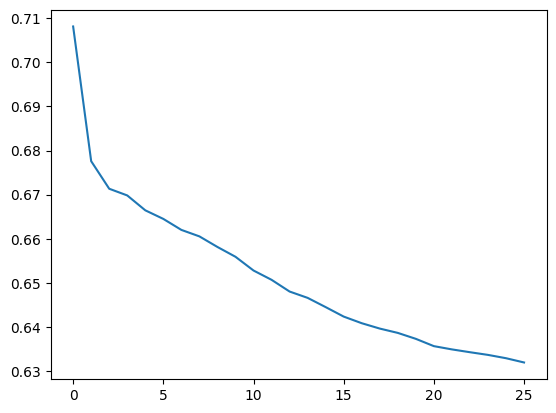

In [180]:
# PLot of training loss
plt.plot(clf.history['loss'])

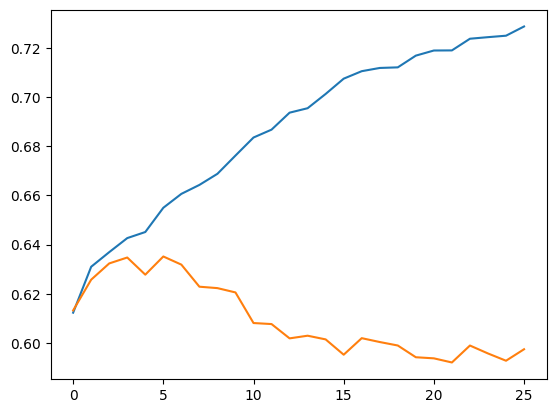

In [181]:
# Plot of train and validation auc
plt.plot(clf.history['train_auc'])
plt.plot(clf.history['valid_auc'])

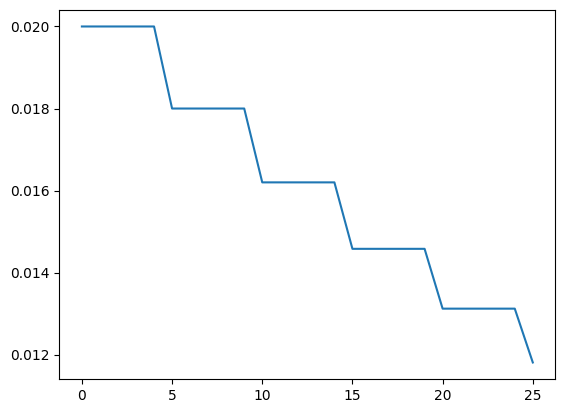

In [182]:
# Plot of how the learning rate decreased with each step
plt.plot(clf.history['lr'])

In [183]:
dataset_name = 'Insurance Dataset'

In [184]:
preds = clf.predict_proba(X_train)
train_auc = roc_auc_score(y_score=preds[:,1], y_true=y_train)

preds = clf.predict_proba(X_test)
test_auc = roc_auc_score(y_score=preds[:,1], y_true=y_test)


preds_valid = clf.predict_proba(X_valid)
valid_auc = roc_auc_score(y_score=preds_valid[:,1], y_true=y_valid)

print(f"BEST TRAIN SCORE FOR {dataset_name} : {train_auc}")
print(f"BEST VALID SCORE FOR {dataset_name} : {valid_auc}")
print(f"FINAL TEST SCORE FOR {dataset_name} : {test_auc}")

BEST VALID SCORE FOR Insurance Dataset : 0.6549623418831473
BEST VALID SCORE FOR Insurance Dataset : 0.6351572416472219
FINAL TEST SCORE FOR Insurance Dataset : 0.6447351784848121


# Save and load Model

In [189]:
saving_path_name = "./tabnet_model_test_1"

In [190]:
# save tabnet model
saving_path_name = "./tabnet_model_test_1"
saved_filepath = clf.save_model(saving_path_name)

Successfully saved model at ./tabnet_model_test_1.zip


In [191]:
# define new model with basic parameters and load state dict weights
loaded_clf = TabNetClassifier()
loaded_clf.load_model("./tabnet_model_test_1.zip")

In [192]:
loaded_preds = loaded_clf.predict_proba(X_test)
loaded_test_auc = roc_auc_score(y_score=loaded_preds[:,1], y_true=y_test)

print(f"FINAL TEST SCORE FOR {dataset_name} : {loaded_test_auc}")

FINAL TEST SCORE FOR Insurance Dataset : 0.6447351784848121


## Decile Analysis

In [185]:
df_train = pd.DataFrame({'obs':y_train,'pred':clf.predict_proba(X_train)[:,1]})
df_train['bin'] = pd.cut(df_train.pred.rank(method='first'),10,labels=range(10,0,-1),duplicates='drop')
dec_bins = df_train.groupby('bin')['obs'].agg(['count','sum']).sort_index(ascending=False)

In [186]:
dec_bins.rename(columns={'count':'nobs','sum':'trgt_count'},inplace=True)
dec_bins['obs_%']=(dec_bins['nobs']/(dec_bins['nobs'].sum()+1))*100
dec_bins['randomline']=dec_bins['obs_%'].cumsum()
dec_bins['trgt_rate%']=(dec_bins['trgt_count']/(dec_bins['nobs']+1))*100
dec_bins['cum_trgt']=dec_bins['trgt_count'].cumsum()
dec_bins['non_trgt']=dec_bins['nobs']-dec_bins['trgt_count']
dec_bins['cum_non_trgt']=dec_bins['non_trgt'].cumsum()
dec_bins['cum_non_trgt%']=(dec_bins['cum_non_trgt']/(dec_bins['non_trgt'].sum()+1))*100
dec_bins['gain']=(dec_bins['cum_trgt']/dec_bins['trgt_count'].sum())*100
dec_bins['cum_lift']=dec_bins['gain']/dec_bins['randomline']
dec_bins

,nobs,trgt_count,obs_%,randomline,trgt_rate%,cum_trgt,non_trgt,cum_non_trgt,cum_non_trgt%,gain,cum_lift
bin,,,,,,,,,,,
1,53586,4488,10.000037,10.000037,8.375166,4488,49098,49098,9.508556,23.013024,2.301294
2,53586,2941,10.000037,20.000075,5.488271,7429,50645,99743,19.316712,38.093529,1.904669
3,53585,2462,9.999851,29.999925,4.594484,9891,51123,150866,29.217439,50.717875,1.690600
4,53586,2044,10.000037,39.999963,3.814358,11935,51542,202408,39.199312,61.198851,1.529973
5,53585,1806,9.999851,49.999813,3.370283,13741,51779,254187,49.227084,70.459440,1.409194
6,53586,1569,10.000037,59.999851,2.927949,15310,52017,306204,59.300947,78.504769,1.308416
7,53586,1406,10.000037,69.999888,2.623771,16716,52180,358384,69.406379,85.714286,1.224492
8,53585,1194,9.999851,79.999739,2.228194,17910,52391,410775,79.552673,91.836735,1.147963
9,53586,974,10.000037,89.999776,1.817605,18884,52612,463387,89.741767,96.831094,1.075904


In [187]:
df_test = pd.DataFrame({'obs':y_test,'pred':clf.predict_proba(X_test)[:,1]})
df_test['bin'] = pd.cut(df_test.pred.rank(method='first'),10,labels=range(10,0,-1),duplicates='drop')
dec_bins_test = df_test.groupby('bin')['obs'].agg(['count','sum']).sort_index(ascending=False)

In [188]:
dec_bins_test.rename(columns={'count':'nobs','sum':'trgt_count'},inplace=True)
dec_bins_test['obs_%']=(dec_bins_test['nobs']/(dec_bins_test['nobs'].sum()+1))*100
dec_bins_test['randomline']=dec_bins_test['obs_%'].cumsum()
dec_bins_test['trgt_rate%']=(dec_bins_test['trgt_count']/(dec_bins_test['nobs']+1))*100
dec_bins_test['cum_trgt']=dec_bins_test['trgt_count'].cumsum()
dec_bins_test['non_trgt']=dec_bins_test['nobs']-dec_bins_test['trgt_count']
dec_bins_test['cum_non_trgt']=dec_bins_test['non_trgt'].cumsum()
dec_bins_test['cum_non_trgt%']=(dec_bins_test['cum_non_trgt']/(dec_bins_test['non_trgt'].sum()+1))*100
dec_bins_test['gain']=(dec_bins_test['cum_trgt']/dec_bins_test['trgt_count'].sum())*100
dec_bins_test['cum_lift']=dec_bins_test['gain']/dec_bins_test['randomline']
dec_bins_test

,nobs,trgt_count,obs_%,randomline,trgt_rate%,cum_trgt,non_trgt,cum_non_trgt,cum_non_trgt%,gain,cum_lift
bin,,,,,,,,,,,
1,2963,232,9.999663,9.999663,7.827260,232,2731,2731,9.580775,20.603908,2.060460
2,2963,184,9.999663,19.999325,6.207827,416,2779,5510,19.329942,36.944938,1.847309
3,2963,150,9.999663,29.998988,5.060729,566,2813,8323,29.198386,50.266430,1.675604
4,2963,124,9.999663,39.998650,4.183536,690,2839,11162,39.158042,61.278863,1.532023
5,2963,94,9.999663,49.998313,3.171390,784,2869,14031,49.222943,69.626998,1.392587
6,2963,87,9.999663,59.997975,2.935223,871,2876,16907,59.312401,77.353464,1.289268
7,2963,88,9.999663,69.997638,2.968961,959,2875,19782,69.398351,85.168739,1.216737
8,2963,62,9.999663,79.997300,2.091768,1021,2901,22683,79.575513,90.674956,1.133475
9,2963,57,9.999663,89.996963,1.923077,1078,2906,25589,89.770216,95.737123,1.063782


In the quest for transparency and insights, we've taken a crucial step by creating a decile plot based on the probability outputs from our TabNet model. This visualization provides valuable insights into how well our model performs across different segments of the test dataset.

As we can see from the chart, the top 30% of the population is able to capture 50% of the Insurance claims. This suggests that our model has a strong ability to identify high-risk individuals who are more likely to file insurance claims.

# Conclusion

For the insurance dataset, I have tried out a lot models, both traditional and deep learning based. Out of them, the only ones that gave some significant results were XgBoost and Tabnet.
The results for both of them are as given below:
* XgBoost : In XgBoost, ROC_AUC score improved to 0.60 and 0.59 on the training and test sets respectively. Despite no significant F1 score improvement, the model’s recall score outperformed other models, reaching 0.59 and 0.56 on the training and test sets.
* Tabnet : TabNet model’s decile plot reveals its performance across the test dataset. Remarkably, the top 30% of the population captures 50% of insurance claims, indicating the model’s strong predictive power for high-risk individuals. This insight is valuable for risk assessment and policy pricing in insurance claim prediction.
* From the results I can say that even though I got good results, if I had more relevant features, I could have improved results. 
* No significant improvement was observed in oversampling method.
* Decile analysis is then performed by arranging the probability values from individual models in descending order and dividing the population into ten equal groups, each representing 10% of the people. Each of these groups, known as deciles, is then analyzed to calculate the lift and capture rate.
This study is essential for developing marketing strategies since it helps pinpoint the top clients who are most likely to react favorably.


# Suggestion

* To give the model a richer context, provide more detailed data, such as policy details, claim history, and vehicle information.
* Add more client information demographics such as age, gender, occupation, and marital status often influence their risk profile. Incorporating these factors into the model can enhance its predictive precision by providing a more comprehensive understanding of the customer’s risk factors. 
* Provide details on the customer’s credit score. This can often correlate with the likelihood of a claim, as customers with lower credit scores may be more likely to make claims.

# Risks

- Data Loading and processing.
- High computational time.
- Without sharing feature information, machine learning modeling becomes complex. The comprehension of each feature’s role, its correlation with the target variable, and its interaction with other features is vital for effective feature engineering, model selection, hyperparameter tuning, and handling categorical features, missing values, and outliers, all of which enhance model performance.
- The amount of data that was available in the dataset was too low to model the complex behaviours responsible for the purchasing decisions of a customer.
- Lack of domain level knowledge hindered the initial process of effective feature engineering for good modeling. A lot of research had to be done to understand each features.
 